## US Election 2020 Tweets Analysis

The ["US Election 2020 Tweets" dataset](https://www.kaggle.com/datasets/manchunhui/us-election-2020-tweets/data) provides an extensive collection of tweets from around the world that include hashtags related to the 2020 U.S. presidential candidates, Biden and Trump.

### Objectives
For the purposes of this analysis, we will focus exclusively on tweets from the United States, in English, to conduct text analysis with Three main goals:

- **Tweets distribution Analysis**: Describe how tweets are distributed between the two U.S. candidates across federal states;
- **Global Sentiment Analysis**: Assess the sentiment of the global population of Twitter users towards Biden and Trump evaluating which sentiment preveals on each of them;
- **Federal States Sentiment Analysis**: Assess the sentiment of each Federal state Twitter users towards Biden and Trump evaluating which sentiment preveals on each of them and if it coherent with the outcome of 2020 elections.

-----------

# Global Sentiment Analysis


In [ ]:
# Import Libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib as mpl
import plotly.express as px 
import plotly.io as pio
from pathlib import Path
import os

# Libraries for Sentiment Analysis 
import re 
import nltk 
from nltk.corpus import stopwords 
from nltk.corpus import wordnet 
from nltk.stem import WordNetLemmatizer 
from textblob import TextBlob 
from wordcloud import WordCloud 
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords, words
from nltk.probability import FreqDist

## Import dataset

Set the directory

In [2]:
# Define the base path
base_path = Path("C:/Users/Davide/Desktop/Alma Mater/SECOND YEAR/PYTHON/Python_project")
# Change the working directory
os.chdir(base_path)

# Define the full path to the CSV file for Trump and Biden
merged_data = base_path / "data" / "data.csv"

# Print the current working directory
print("Current Working Directory:", Path.cwd())

Current Working Directory: C:\Users\Davide\Desktop\Alma Mater\SECOND YEAR\PYTHON\Python_project


Load data

In [3]:
try:
    data = pd.read_csv(merged_data, encoding="utf-8", engine='python', on_bad_lines='skip')
    print("First 5 rows of the DataFrame:")
    print(data.head())
except Exception as e:
    print("Error loading the file:", e)

First 5 rows of the DataFrame:
   level_0  index           created_at      tweet_id  \
0        0      0  2020-10-15 00:00:01  1.316529e+18   
1        2      2  2020-10-15 00:00:02  1.316529e+18   
2        4      4  2020-10-15 00:00:08  1.316529e+18   
3        5      5  2020-10-15 00:00:17  1.316529e+18   
4        7      7  2020-10-15 00:00:18  1.316529e+18   

                                               tweet  likes  retweet_count  \
0  #Elecciones2020 | En #Florida: #JoeBiden dice ...    0.0            0.0   
1  #Trump: As a student I used to hear for years,...    2.0            1.0   
2  You get a tie! And you get a tie! #Trump ‘s ra...    4.0            3.0   
3  @CLady62 Her 15 minutes were over long time ag...    2.0            0.0   
4  @DeeviousDenise @realDonaldTrump @nypost There...    0.0            0.0   

                source       user_id  \
0            TweetDeck  3.606665e+08   
1      Twitter Web App  8.436472e+06   
2   Twitter for iPhone  4.741380e+07   
3  

### Text Analysis Data Cleaning

turn the tweets into lowercase latters

In [5]:
data['tweet'] = data['tweet'].str.lower()  
print("Sample of 5 tweets after converting to lowercase:")
print(data['tweet'].sample(5))  # Check randomly

Sample of 5 tweets after converting to lowercase:
115025    this alone proves how different the #covid19 r...
141686    #trump's campaign system "#deathstar" - we alw...
291878    it's not over until it is truly over. get out ...
122319    #trump absolutely causes #exhaustion!! https:/...
394011    @realericcarmen how did that trump landslide w...
Name: tweet, dtype: object


In [ ]:
# Check if each tweet is composed only of lowercase characters
all_lowercase = data['tweet'].apply(lambda x: x.islower())

# Count the number of tweets that are not in lowercase
non_lowercase_count = all_lowercase.value_counts().get(False, 0)  # Count False values
print("Number of tweets not in lowercase:", non_lowercase_count)

Number of tweets not in lowercase: 135


The problem persists: some tweets have parts that are written in **bold** or *italics*.

In [8]:
# Use unicodedata to normalize these special Unicode characters to their base forms before converting them to lowercase.
import unicodedata 
data['tweet'] = data['tweet'].apply(lambda x: unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8').lower())
# Check if each tweet is composed only of lowercase characters
all_lowercase = data['tweet'].apply(lambda x: x.islower())

# Count the number of tweets that are not in lowercase
non_lowercase_count = all_lowercase.value_counts().get(False, 0)  # Count False values
print("Number of tweets not in lowercase:", non_lowercase_count)

# Check randomly
print("Sample of 5 tweets after converting to lowercase:")
print(data['tweet'].sample(5))  

Number of tweets not in lowercase: 0
Sample of 5 tweets after converting to lowercase:
274247    @1776project2 @trumpwarroom but the reality is...
352182    @varsha_venkat_ me too varsha! \n\nhere's me b...
83190     #trump has no plan for anything. #votebluetosa...
160542    this is good for the gop for the future when t...
246157    #joebiden  is corrupt too :  karl rove: trump ...
Name: tweet, dtype: object


## Tokenization

### Sentence Tokenization

In [10]:
data['tokenized_tweet'] = data['tweet'].apply(sent_tokenize)
print("Sample of tokenized tweets:")
print(data['tokenized_tweet'].sample(5))  # Verifica le prime righe

Sample of tokenized tweets:
216025    [@megynkelly democracy... it was good while it...
388894    [#biden, legalize the weed., that'll go a long...
263906    [moi aussi ., @jenseniorny moi aussi!, #biden ...
373305    ["you're fired"\n#vicepresidentelectharris\n#p...
48690     [isnt it telling that the worst thing the #gop...
Name: tokenized_tweet, dtype: object


Remove punctuations

In [ ]:
# Funzione per rimuovere la punteggiatura
def remove_punctuation(tokens):
    return [re.sub(r'[^\w\s]', '', word) for word in tokens]

# Rimuovi la punteggiatura dalla colonna 'tokenized_tweet'
data['tokenized_tweet'] = data['tokenized_tweet'].apply(remove_punctuation)
print("Sample of tokenized tweets after punctuation removal:")
print(data['tokenized_tweet'].sample(5))

### Function to check for punctuation in a list of tokens
def contains_punctuation(tokens):
    return any(re.search(r'[^\w\s]', word) for word in tokens)

### Check if any tokenized tweets contain punctuation
tweets_with_punctuation = data['tokenized_tweet'].apply(contains_punctuation)

### Count the number of tokenized tweets that contain punctuation. There are 0 tokenized tweets with punctuation
punctuation_count = tweets_with_punctuation.value_counts().get(True, 0)  # Count True values and 0 if no tweet with punctuation
print("Number of tokenized tweets containing punctuation:", punctuation_count)

Sample of tokenized tweets after punctuation removal:
109471    [gop mike_pence christians dont make fun of th...
193732    [12news the election is riggedthe plan to send...
379168    [thehill i dare people to admit the truth, you...
331751    [for weeks we were told that on electionnight ...
14124     [todays gop platform is nothing more than a vo...
Name: tokenized_tweet, dtype: object
Number of tokenized tweets containing punctuation: 0


### Word Tokenization

In [12]:
tokenized_words = data['tokenized_tweet'].apply(lambda x: [word_tokenize(sentence) for sentence in x])
print("Sample of word tokenized tweets:")
print(tokenized_words.sample(5))

Sample of word tokenized tweets:
86883     [[morningjoe, jared, kushner, with, his, felon...
79034     [[i, cast, my, vote, for, donald, j, trump, to...
318220    [[vote, joebiden, bidenharris, httpstcoc9ijmvk...
160163    [[thats, a, lie], [shame, on, trump, accusing,...
386304    [[karma], [what, goes, around, comes, around],...
Name: tokenized_tweet, dtype: object


Flate the column tweet

In [14]:
# flat the list of lists in just a lists of sentences
all_words_flat = [word for sublist in tokenized_words for word in sublist]
print("First 10 words from the flattened list:")
print(all_words_flat[:10])  # Stampa le prime 10 parole

#flat the list of sentences in a list of words
all_word_list = [word for sublist in all_words_flat for word in sublist]
print("First 10 words from the one list:")
print(all_word_list[:100])  # Stampa le prime 10 parole

First 10 words from the flattened list:
[['elecciones2020', 'en', 'florida', 'joebiden', 'dice', 'que', 'donaldtrump', 'solo', 'se', 'preocupa', 'por', 'el', 'mismo'], ['el', 'democrata', 'fue', 'anfitrion', 'de', 'encuentros', 'de', 'electores', 'en', 'pembrokepines', 'y', 'miramar'], ['clic', 'aqui', 'httpstcoqhiwpiuxst', '_', 'elsollatino', 'yobrilloconelsol', 'httpstco6flcbwf1mi'], ['trump', 'as', 'a', 'student', 'i', 'used', 'to', 'hear', 'for', 'years', 'for', 'ten', 'years', 'i', 'heard', 'china'], ['in', '2019'], ['and', 'we', 'have', '15', 'and', 'they', 'dont', 'know', 'how', 'many', 'we', 'have', 'and', 'i', 'asked', 'them', 'how', 'many', 'do', 'we', 'have', 'and', 'they', 'said', 'sir', 'we', 'dont', 'know'], ['but', 'we', 'have', 'millions'], ['like', '300', 'million'], ['um'], ['what']]
First 10 words from the one list:
['elecciones2020', 'en', 'florida', 'joebiden', 'dice', 'que', 'donaldtrump', 'solo', 'se', 'preocupa', 'por', 'el', 'mismo', 'el', 'democrata', 'fue', '

## English Words Selection

 Remove **Links**

In [97]:
#count the links
http_count = len([word for word in all_word_list if word.startswith("http")])

print("Count of words starting with 'http':", http_count)

Count of words starting with 'http': 257850


In [98]:
###we retain only those words that are not links
all_word_list = [word for word in all_word_list if not word.startswith("http")]

###Check if there are any words starting with "https" in filtered_word
has_https = any(word.startswith("https") for word in all_word_list)

if has_https:
    print("There are still words starting with 'https' in filtered_word.")
else:
    print("No words starting with 'https' remain in filtered_word.")

print(all_word_list[:100]) 

No words starting with 'https' remain in filtered_word.
['elecciones2020', 'en', 'florida', 'joebiden', 'dice', 'que', 'donaldtrump', 'solo', 'se', 'preocupa', 'por', 'el', 'mismo', 'el', 'democrata', 'fue', 'anfitrion', 'de', 'encuentros', 'de', 'electores', 'en', 'pembrokepines', 'y', 'miramar', 'clic', 'aqui', '_', 'elsollatino', 'yobrilloconelsol', 'trump', 'as', 'a', 'student', 'i', 'used', 'to', 'hear', 'for', 'years', 'for', 'ten', 'years', 'i', 'heard', 'china', 'in', '2019', 'and', 'we', 'have', '15', 'and', 'they', 'dont', 'know', 'how', 'many', 'we', 'have', 'and', 'i', 'asked', 'them', 'how', 'many', 'do', 'we', 'have', 'and', 'they', 'said', 'sir', 'we', 'dont', 'know', 'but', 'we', 'have', 'millions', 'like', '300', 'million', 'um', 'what', 'you', 'get', 'a', 'tie', 'and', 'you', 'get', 'a', 'tie', 'trump', 's', 'rally', 'iowa', 'clady62', 'her']


Remove **non-english** words

In [99]:
# Get the set of English words
english_words = set(words.words()) #remember to add biden back

#Since we have some words that are spanish but are also part of the english dictionary, we try to drop them
nltk.download('cess_esp')  # A Spanish corpus
from nltk.corpus import cess_esp
spanish_words = set(cess_esp.words())

non_english_words = spanish_words 

[nltk_data] Downloading package cess_esp to
[nltk_data]     C:\Users\Davide\AppData\Roaming\nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!


In [100]:
# Remove non-English words and count them
filtered_english_words = [
    word for word in all_word_list
    if word in english_words and word not in non_english_words or word.lower() == "biden"
]

total_words = len(all_word_list)

non_english_count = total_words - len(filtered_english_words)

print("Number of non-English words removed:", non_english_count) 

print("Filtered English words:", filtered_english_words[:100]) 

# Check if any non-English words remain in filtered_english_words
remaining_non_english = [word for word in filtered_english_words if word not in english_words]
if remaining_non_english:
    print("Non-English words still present:", remaining_non_english[:100])
else:
    print("All words are now English.")

Number of non-English words removed: 3205015
Filtered English words: ['trump', 'as', 'student', 'i', 'used', 'to', 'hear', 'for', 'for', 'ten', 'i', 'in', 'and', 'we', 'have', 'and', 'they', 'dont', 'know', 'how', 'many', 'we', 'have', 'and', 'i', 'them', 'how', 'many', 'do', 'we', 'have', 'and', 'they', 'said', 'sir', 'we', 'dont', 'know', 'but', 'we', 'have', 'millions', 'like', 'million', 'um', 'what', 'you', 'get', 'tie', 'and', 'you', 'get', 'tie', 'trump', 's', 'rally', 'her', 'were', 'over', 'long', 'time', 'ago', 'never', 'the', 'black', 'community', 'she', 'cried', 'to', 'trump', 'begging', 'for', 'job', 'there', 'wont', 'be', 'many', 'of', 'them', 'unless', 'you', 'all', 'have', 'been', 'voting', 'more', 'than', 'again', 'but', 'god', 'bo', 'was', 'the', 'most', 'corrupt', 'president', 'ever', 'dark', 'to', 'light']
Non-English words still present: ['biden', 'biden', 'biden', 'biden', 'biden', 'biden', 'biden', 'biden', 'biden', 'biden', 'biden', 'biden', 'biden', 'biden', 'b

## Stopwords

Remove stop words

In [101]:
stop_words=set(stopwords.words("english"))
print(stop_words)

{'does', 'about', 'themselves', 'your', 'ma', 'its', 'when', "she's", "you'd", 'each', 'which', 'o', 'over', 'and', 'should', 'why', 'isn', 'me', 'few', 'between', 'mustn', 'wasn', 'below', 'on', 'of', 'down', 'but', "weren't", 'wouldn', 'for', 'through', 'am', 'so', 'her', 'are', 'is', 'won', 'mightn', "wasn't", 'in', 't', 'shan', 'off', "doesn't", 'yourselves', 'him', 'have', 'hasn', 'be', "it's", 'he', 'such', 'hadn', 'whom', 'how', 'with', 'been', 'because', "that'll", 'too', 'no', 'all', 'she', "couldn't", 'that', 'just', 'this', 'not', 'where', "mightn't", 'if', 'doing', 'doesn', 'his', "didn't", 'didn', 'couldn', 'these', 'd', "you're", 'before', 'yourself', 'has', 'they', 'm', 'into', "you've", 'myself', 'who', 'until', 'under', "mustn't", 're', 'shouldn', 'there', 'weren', "shouldn't", "aren't", 'most', 'we', 'i', 'herself', 'aren', 've', 'other', "haven't", 'itself', 'needn', 'had', 'both', 'did', 'their', 'more', 'only', 'those', 'having', "wouldn't", 'once', 'at', 'don', "w

In [102]:
# Rimuovi le stopword 
filtered_word = []
for w in filtered_english_words:
    if w not in stop_words:
        filtered_word.append(w)

Here the issue is that there are still non relevant english words that are not informative at all and that we can try to eliminate as stopwords

In [37]:
!python -m spacy download en_core_web_sm
import spacy

# Carica il modello di lingua inglese
nlp = spacy.load("en_core_web_sm")

# Crea un set di stop words in inglese
stop_words = {word.text.lower() for word in nlp.vocab if word.is_stop}

# Rimuovi le parole dal tuo elenco
filtered_word = []
for w in all_word_list:
    if w.lower() not in stop_words:
        filtered_word.append(w)

# Salva solo le prime 20 parole filtrate
filtered_word = filtered_word[:20]

print("\n\nFiltered Sentence:", filtered_word)


c:\Users\Davide\miniconda3\envs\env1\python.exe: No module named spacy


ModuleNotFoundError: No module named 'spacy'

## Lemmatization

In [105]:
import nltk
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

resources = [
    'names',  # A list of common English names
    'stopwords',  # A list of common words
    'state_union',  # Transcribed State of the Union addresses
    'twitter_samples',  # A list of Twitter phrases
    'movie_reviews',  # Two thousand categorized movie reviews
    'averaged_perceptron_tagger',  # POS tagging model
    'vader_lexicon',  # Scored lexicon for sentiment analysis
    'punkt',  # Sentence tokenizer
    'wordnet'
]

# Download each resource
for resource in resources:
    nltk.download(resource)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Davide\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package names to
[nltk_data]     C:\Users\Davide\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Davide\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package state_union to
[nltk_data]     C:\Users\Davide\AppData\Roaming\nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\Davide\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Davide\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloadin

In [106]:
lem = WordNetLemmatizer()

lemmatized_words = [lem.lemmatize(word) for word in filtered_word] 
print("Original words:", filtered_word[:100])
print("Lemmatized Words:", lemmatized_words[:100]) #need for pos tagging in order to have lemmatization that works properly 

Original words: ['trump', 'student', 'used', 'hear', 'ten', 'dont', 'know', 'many', 'many', 'said', 'sir', 'dont', 'know', 'millions', 'like', 'million', 'um', 'get', 'tie', 'get', 'tie', 'trump', 'rally', 'long', 'time', 'ago', 'never', 'black', 'community', 'cried', 'trump', 'begging', 'job', 'wont', 'many', 'unless', 'voting', 'god', 'bo', 'corrupt', 'president', 'ever', 'dark', 'light', 'coming', 'wouldnt', 'last', 'forever', 'trump', 'one', 'single', 'effective', 'eradicate', 'another', 'round', 'trump', 'plague', 'censorship', 'twitter', 'manipulate', 'us', 'election', 'trump', 'twitter', 'thats', 'always', 'fine', 'jack', 'jack', 'sick', 'trump', 'winning', 'trump', 'pay', 'mass', 'murder', 'family', 'spent', 'tax', 'payer', 'time', 'money', 'chasing', 'trump', 'serving', 'public', 'good', 'economically', 'bail', 'people', 'protect', 'took', 'oath', 'trump', 'nobody', 'tell', 'better', 'way', 'working', 'check']
Lemmatized Words: ['trump', 'student', 'used', 'hear', 'ten', 'dont

## POS tagging

In [107]:
tagged_words=nltk.pos_tag(filtered_word) ###here we should use filtered_english_words, and not lemmatized_words as before
#tagged_words=nltk.pos_tag(lemmatized_words)
print(tagged_words[:100])

[('trump', 'NN'), ('student', 'NN'), ('used', 'VBN'), ('hear', 'RB'), ('ten', 'JJ'), ('dont', 'NNS'), ('know', 'VBP'), ('many', 'JJ'), ('many', 'JJ'), ('said', 'VBD'), ('sir', 'JJ'), ('dont', 'NN'), ('know', 'VBP'), ('millions', 'NNS'), ('like', 'IN'), ('million', 'CD'), ('um', 'JJ'), ('get', 'VB'), ('tie', 'JJ'), ('get', 'VB'), ('tie', 'JJ'), ('trump', 'NNS'), ('rally', 'RB'), ('long', 'JJ'), ('time', 'NN'), ('ago', 'RB'), ('never', 'RB'), ('black', 'JJ'), ('community', 'NN'), ('cried', 'VBD'), ('trump', 'NN'), ('begging', 'VBG'), ('job', 'NN'), ('wont', 'VBD'), ('many', 'JJ'), ('unless', 'IN'), ('voting', 'VBG'), ('god', 'NN'), ('bo', 'NN'), ('corrupt', 'NN'), ('president', 'NN'), ('ever', 'RB'), ('dark', 'JJ'), ('light', 'NN'), ('coming', 'VBG'), ('wouldnt', 'JJ'), ('last', 'JJ'), ('forever', 'RB'), ('trump', 'VBP'), ('one', 'CD'), ('single', 'JJ'), ('effective', 'JJ'), ('eradicate', 'NN'), ('another', 'DT'), ('round', 'NN'), ('trump', 'NN'), ('plague', 'NN'), ('censorship', 'NN'), 

In [109]:
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None


In [110]:
tagged_words = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), tagged_words)

In [111]:
lem_words=[]
for word, tag in tagged_words:
        if tag is None:
            #if there is no available tag, append the token as it is
            lem_words.append(word)
        else:        
            #else use the tag to lemmatize the token
            lem_words.append(lem.lemmatize(word, tag))

In [112]:
print('lemmatized words: ', lem_words[:100])

lemmatized words:  ['trump', 'student', 'use', 'hear', 'ten', 'dont', 'know', 'many', 'many', 'say', 'sir', 'dont', 'know', 'million', 'like', 'million', 'um', 'get', 'tie', 'get', 'tie', 'trump', 'rally', 'long', 'time', 'ago', 'never', 'black', 'community', 'cry', 'trump', 'beg', 'job', 'wont', 'many', 'unless', 'vote', 'god', 'bo', 'corrupt', 'president', 'ever', 'dark', 'light', 'come', 'wouldnt', 'last', 'forever', 'trump', 'one', 'single', 'effective', 'eradicate', 'another', 'round', 'trump', 'plague', 'censorship', 'twitter', 'manipulate', 'us', 'election', 'trump', 'twitter', 'thats', 'always', 'fine', 'jack', 'jack', 'sick', 'trump', 'win', 'trump', 'pay', 'mass', 'murder', 'family', 'spend', 'tax', 'payer', 'time', 'money', 'chase', 'trump', 'serve', 'public', 'good', 'economically', 'bail', 'people', 'protect', 'take', 'oath', 'trump', 'nobody', 'tell', 'good', 'way', 'work', 'check']


## Frequency analysis

In [113]:
from nltk.probability import FreqDist
fdist = FreqDist(lem_words) 

In [114]:
fdist.most_common(10)  #frequency of ten most common words.
###some very common words remain. Might need to look for a command that eliminates very common verbs or add them to stopwords

[('trump', 265683),
 ('biden', 168579),
 ('president', 29046),
 ('election', 27394),
 ('go', 27192),
 ('get', 26558),
 ('like', 22398),
 ('people', 22112),
 ('say', 20835),
 ('us', 18747)]

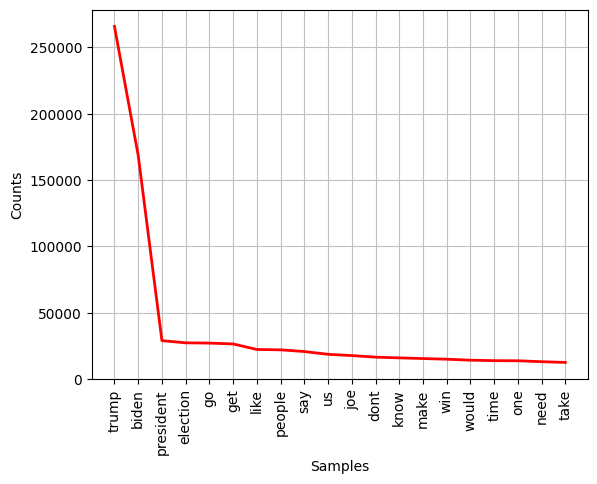

In [123]:
fdist.plot(20,cumulative=False, color='red')
plt.show()

**comment**: most of the tweets mention trump directly, while  biden doesn't even appear in the list. This confirms that trump is the most controversial character of the election. Recall to manage better the stop words and take biden

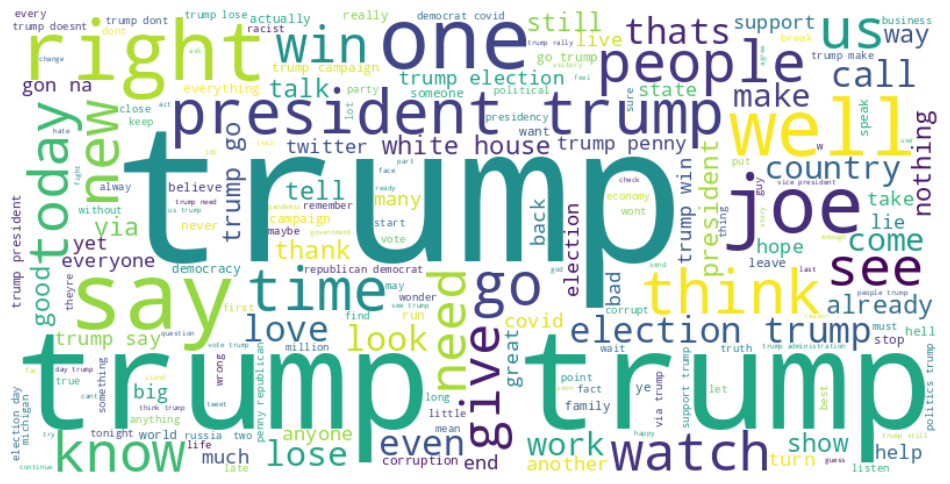

In [73]:
# Create a single string from the list of lemmatized words
text = ' '.join(lem_words)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated word cloud
plt.figure(figsize=(12, 10)) #his line creates a new figure for plotting
plt.imshow(wordcloud, interpolation='bilinear') #This line displays the generated word cloud as an image. The wordcloud variable contains the word cloud data that was generated earlier.#The interpolation='bilinear' argument is used to improve the rendering quality of the image, making it look smoother when displayed.
plt.axis('off')  # Do not show axis
plt.show()

## Functions for Sentiment Analysis

We shall only take into account US citizens’ opinions here, as they are a crucial deciding factor in who becomes the US president.

In [75]:
def clean(text): 
	# Remove URLs 
	text = re.sub(r'https?://\S+|www\.\S+', '', str(text)) 

	# Convert text to lowercase 
	text = text.lower() 

	# Replace anything other than alphabets a-z with a space 
	text = re.sub('[^a-z]', ' ', text) 

	# Split the text into single words 
	text = text.split() 

	# Initialize WordNetLemmatizer 
	lm = WordNetLemmatizer() 

	# Lemmatize words and remove stopwords 
	text = [lm.lemmatize(word) for word in text if word not in set( 
		stopwords.words('english'))] 

	# Join the words back into a sentence 
	text = ' '.join(word for word in text) 

	return text 

Get polarity, subjectivity, and Analysis Now, let’s create a function to get polarity, subjectivity, and Analysis function to fetch sentiments from the data.

In [76]:
def getpolarity(text): 
    return TextBlob(text).sentiment.polarity 

def getsubjectivity(text): 
    return TextBlob(text).sentiment.subjectivity 

def getAnalysis(score): 
    if score < 0: 
        return 'negative'
    elif score == 0: 
        return 'neutral'
    else: 
        return 'positive'

## Sentiment Analysis for **Trump**

In [77]:
# focus on tweets that were originally in the trump dataset
trump_tweets = data[data['candidate'] == 'trump'] 
# take only U.S. country data 
trump_tweets = trump_tweets.loc[trump_tweets.country == 'US'] 
trump_tweets = trump_tweets[['tweet']] #consider only the tweet column
print(trump_tweets.head()) 


                                               tweet
0  #elecciones2020 | en #florida: #joebiden dice ...
1  #trump: as a student i used to hear for years,...
2  you get a tie! and you get a tie! #trump s ral...
3  @clady62 her 15 minutes were over long time ag...
4  @deeviousdenise @realdonaldtrump @nypost there...


In [78]:
trump_tweets['cleantext'] = trump_tweets['tweet'].apply(clean) 
print(trump_tweets.head()) 

                                               tweet  \
0  #elecciones2020 | en #florida: #joebiden dice ...   
1  #trump: as a student i used to hear for years,...   
2  you get a tie! and you get a tie! #trump s ral...   
3  @clady62 her 15 minutes were over long time ag...   
4  @deeviousdenise @realdonaldtrump @nypost there...   

                                           cleantext  
0  elecciones en florida joebiden dice que donald...  
1  trump student used hear year ten year heard ch...  
2                   get tie get tie trump rally iowa  
3  clady minute long time ago omarosa never repre...  
4  deeviousdenise realdonaldtrump nypost wont man...  


In [79]:
fdist = FreqDist(trump_tweets['cleantext']) 
fdist.most_common(10)

[('trump', 1384),
 ('realdonaldtrump anti trump please vote makeamericaunitedagain vetsforscience ftrumps operationmaga antitrump dumptrump biden trump voteblue negligenthomicide blm murdererinchief bidenharris shitler fucktrumpsshit',
  543),
 ('donaldtrump', 226),
 ('trump gop maga election voteblue rememberinnovember vote blue', 119),
 ('trump naysay stimulus ubi gli package leaf risk community unable prep extinctionlevelevent ele teotwawki climateapocalypse pandemic shtf',
  111),
 ('anti trump please vote makeamericaunitedagain vetsforscience ftrumps operationmaga antitrump dumptrump biden trump voteblue negligenthomicide blm murdererinchief bidenharris shitler fucktrumpsshit',
  106),
 ('trump trump', 106),
 ('arizona arizonacircle bb covid gh israel kanganaranaut kamalaharris kiddwaya mewgulf netflix p quote cat trumprally azkar votebidenharris xrp catsoftwitter cat catsofinstagram kitten trump',
  100),
 ('trump trump maga', 98),
 ('vote trump', 95)]

In [80]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

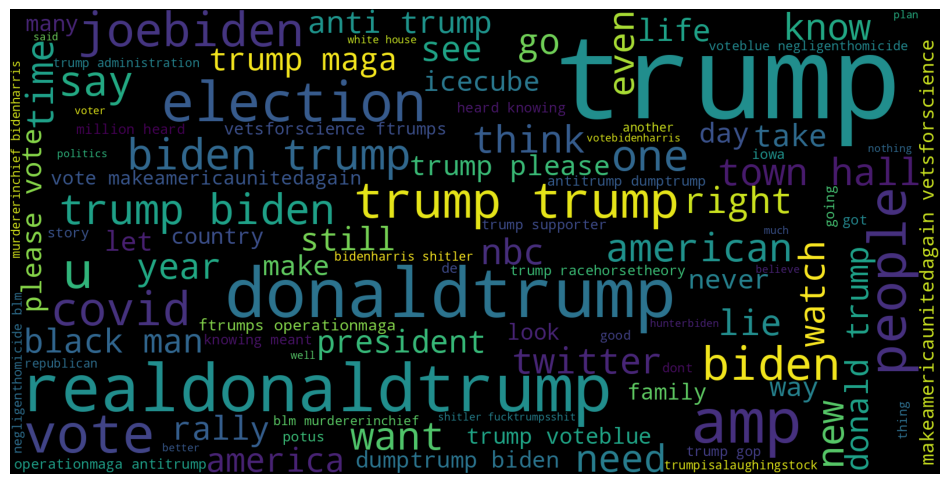

In [81]:
def word_cloud(wd_list): 
	stopwords = set(STOPWORDS) 
	all_words = ' '.join([text for text in wd_list]) 
	wordcloud = WordCloud(background_color='black', 
						stopwords=stopwords, 
						width=1600, height=800, max_words=100, max_font_size=200, 
						colormap="viridis").generate(all_words) 
	plt.figure(figsize=(12, 10)) 
	plt.axis('off') 
	plt.imshow(wordcloud) 

word_cloud(trump_tweets['cleantext'][:5000]) 

This cloud oof words is used to understand the overall sentiment of the tweets in Trump's dataset. Besides "trump" and recurrent formulas suach as "make america united again" and "maga", there are also a lot of negative words, such as: "dumptrump", 
#"fucktrumpshit", 2trump is a laughing stock", "shitler", "murdererinchief". This may indicate that Trump spurs a lot of controversy and negative sentiment. Moroever, the presence of "Hunter Biden" also indicates that many tweets with #trump have been direct attacks to Joe Biden's son, 
#which is known to have a history of personal issues. This may indicate an overall sentiment of hostility between the two parts

In [82]:
#obtaining subjectivity for Trump's tweets. this is meant to know if the sentence is subjective or objective. Subjective means sentence refers to a personal opinion and not facts whereas objective means facts
trump_tweets['subjectivity'] = trump_tweets['cleantext'].apply(getsubjectivity) 

In [83]:
#obtaining polarity for Trump's tweets. It is represented by a float value that lies between -1 and 1, where 1 = positive sentiment, -1 = negative sentiment
trump_tweets['polarity'] = trump_tweets['cleantext'].apply(getpolarity) 

In [84]:
#classifying sentiments as positive, negative or neutral
trump_tweets['analysis'] = trump_tweets['polarity'].apply(getAnalysis) 
trump_tweets.head() 

,tweet,cleantext,subjectivity,polarity,analysis
0,#elecciones2020 | en #florida: #joebiden dice ...,elecciones en florida joebiden dice que donald...,0.000000,0.000000,neutral
1,"#trump: as a student i used to hear for years,...",trump student used hear year ten year heard ch...,0.333333,0.333333,positive
2,you get a tie! and you get a tie! #trump s ral...,get tie get tie trump rally iowa,0.000000,0.000000,neutral
3,@clady62 her 15 minutes were over long time ag...,clady minute long time ago omarosa never repre...,0.416667,-0.108333,negative
4,@deeviousdenise @realdonaldtrump @nypost there...,deeviousdenise realdonaldtrump nypost wont man...,0.533333,0.050000,positive


In [85]:
#analyzing sentiment analysis results for Trump
trump_tweets.analysis.value_counts(normalize=True)*100 #normalize=true gives relative frequencies, i.e. percentages

analysis
neutral     43.072508
positive    33.898687
negative    23.028805
Name: proportion, dtype: float64

**COMMENT**: there is a considerable amount of neutrality towards trump. Although positive tweets seem to be more than negative ones, the negative ones amount to a non-negligible 23%

In [ ]:
# how much data is positive/negetive/neutral 
plt.style.use('dark_background') # Adding black theme 

# Define colors for each bar 
colors = ['orange', 'blue', 'red'] 

plt.figure(figsize=(7, 5)) 
(trump_tweets.analysis.value_counts(normalize=True) * 100).plot.bar(color=colors) 
plt.ylabel("%age of tweets") 
plt.title("Distribution of Sentiments towards Trump") 
plt.show() 

## Sentiment Analysis for **Biden**

In [86]:
biden_tweets = data[data['candidate'] == 'biden'] 
biden_tweets = biden_tweets.loc[biden_tweets.country == 'US'] 
biden_tweets = biden_tweets[['tweet']] 
biden_tweets

,tweet
213259,#elecciones2020 | en #florida: #joebiden dice ...
213260,@islandgirlprv @bradbeauregardj @meidastouch t...
213261,#censorship #hunterbiden #biden #bidenemails #...
213262,"in 2020, #nypost is being #censorship #censore..."
213263,"fbi allegedly obtained hunter biden computer, ..."
...,...
394390,#election #2020elections #trump #biden https:/...
394391,@gop @gopleader @senatemajldr @lindseygrahamsc...
394392,@flotus im excited to have a flotus whose vagi...
394393,the man needs some help...#usa #biden\nwhen wi...


In [87]:
biden_tweets['cleantext']=biden_tweets['tweet'].apply(clean) 
biden_tweets.head()

,tweet,cleantext
213259,#elecciones2020 | en #florida: #joebiden dice ...,elecciones en florida joebiden dice que donald...
213260,@islandgirlprv @bradbeauregardj @meidastouch t...,islandgirlprv bradbeauregardj meidastouch bide...
213261,#censorship #hunterbiden #biden #bidenemails #...,censorship hunterbiden biden bidenemails biden...
213262,"in 2020, #nypost is being #censorship #censore...",nypost censorship censored twitter manipulate ...
213263,"fbi allegedly obtained hunter biden computer, ...",fbi allegedly obtained hunter biden computer d...


In [88]:
biden_tweets['subjectivity'] = biden_tweets['cleantext'].apply(getsubjectivity) 
biden_tweets['polarity'] = biden_tweets['cleantext'].apply(getpolarity) 
biden_tweets['analysis'] = biden_tweets['polarity'].apply(getAnalysis) 
biden_tweets.head() 

,tweet,cleantext,subjectivity,polarity,analysis
213259,#elecciones2020 | en #florida: #joebiden dice ...,elecciones en florida joebiden dice que donald...,0.000000,0.00000,neutral
213260,@islandgirlprv @bradbeauregardj @meidastouch t...,islandgirlprv bradbeauregardj meidastouch bide...,0.000000,0.00000,neutral
213261,#censorship #hunterbiden #biden #bidenemails #...,censorship hunterbiden biden bidenemails biden...,0.000000,0.00000,neutral
213262,"in 2020, #nypost is being #censorship #censore...",nypost censorship censored twitter manipulate ...,0.678571,-0.14881,negative
213263,"fbi allegedly obtained hunter biden computer, ...",fbi allegedly obtained hunter biden computer d...,0.100000,-0.10000,negative


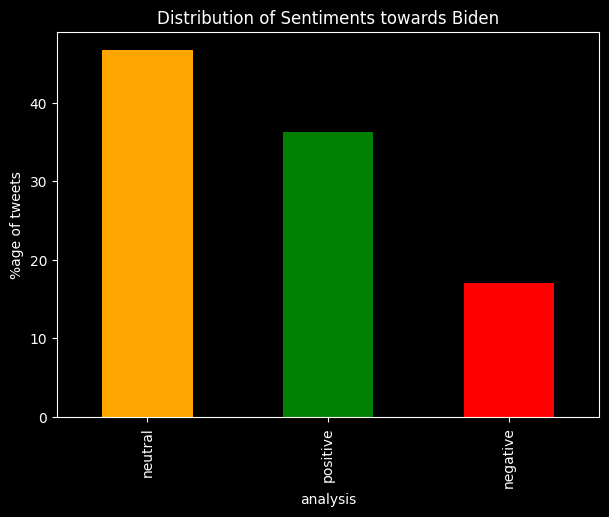

In [89]:
# how much data is positive/negetive/neutral 
plt.style.use('dark_background') 

# Define colors for each bar 
colors = ['orange', 'green', 'red'] 

plt.figure(figsize=(7, 5)) 
(biden_tweets.analysis.value_counts(normalize=True) * 100).plot.bar(color=colors) 
plt.ylabel("%age of tweets") 
plt.title("Distribution of Sentiments towards Biden") 
plt.show() 

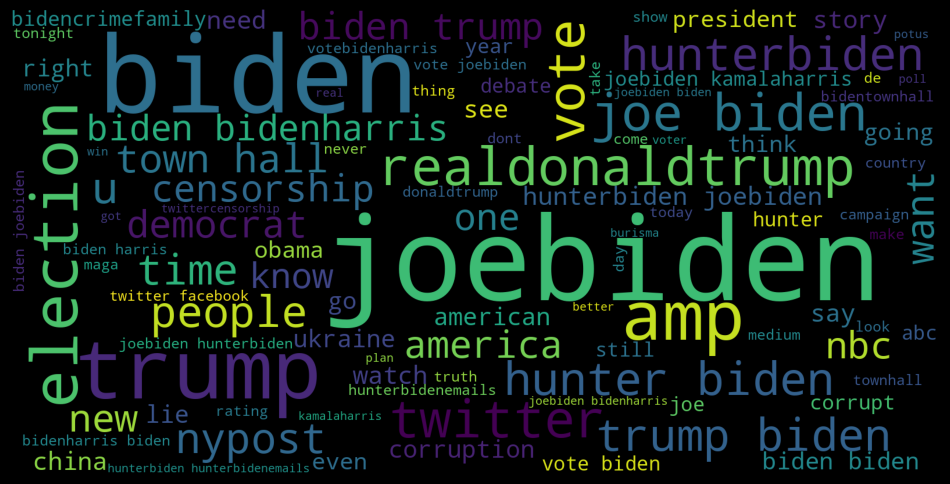

In [90]:
word_cloud(biden_tweets['cleantext'][:5000])

In [91]:
biden_tweets.analysis.value_counts(normalize=True)*100

analysis
neutral     46.685363
positive    36.309182
negative    17.005454
Name: proportion, dtype: float64